In [235]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from matplotlib.patches import FancyArrowPatch

df = pd.read_csv('economic_data.csv')
df['date'] = pd.to_datetime(df['date'])

col_to_update = ['unemployment rate', 'cpi yoy', 'core cpi', 'gdp yoy', 'interest rates']
for col in col_to_update:
   df[col] = df[col].str.replace('%', '').astype(float)

df.tail()

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
427,united states,2023-08-01,47.6,54.5,71.2,5.5,3.7,4.3,3.8,2.9,dxy,101.87,104.45,101.74,103.62
428,united states,2023-09-01,49.0,53.6,67.7,5.5,3.7,4.1,3.8,2.9,dxy,103.62,106.84,103.27,106.22
429,united states,2023-10-01,46.7,51.8,63.8,5.5,3.2,4.0,3.9,3.1,dxy,106.17,107.35,105.36,106.66
430,united states,2023-11-01,46.7,52.5,61.3,5.5,3.1,4.0,3.7,3.1,dxy,106.67,107.11,102.47,103.50
431,united states,2023-12-01,47.4,50.5,69.7,5.5,3.4,3.9,3.7,3.1,dxy,103.36,104.26,100.62,101.33


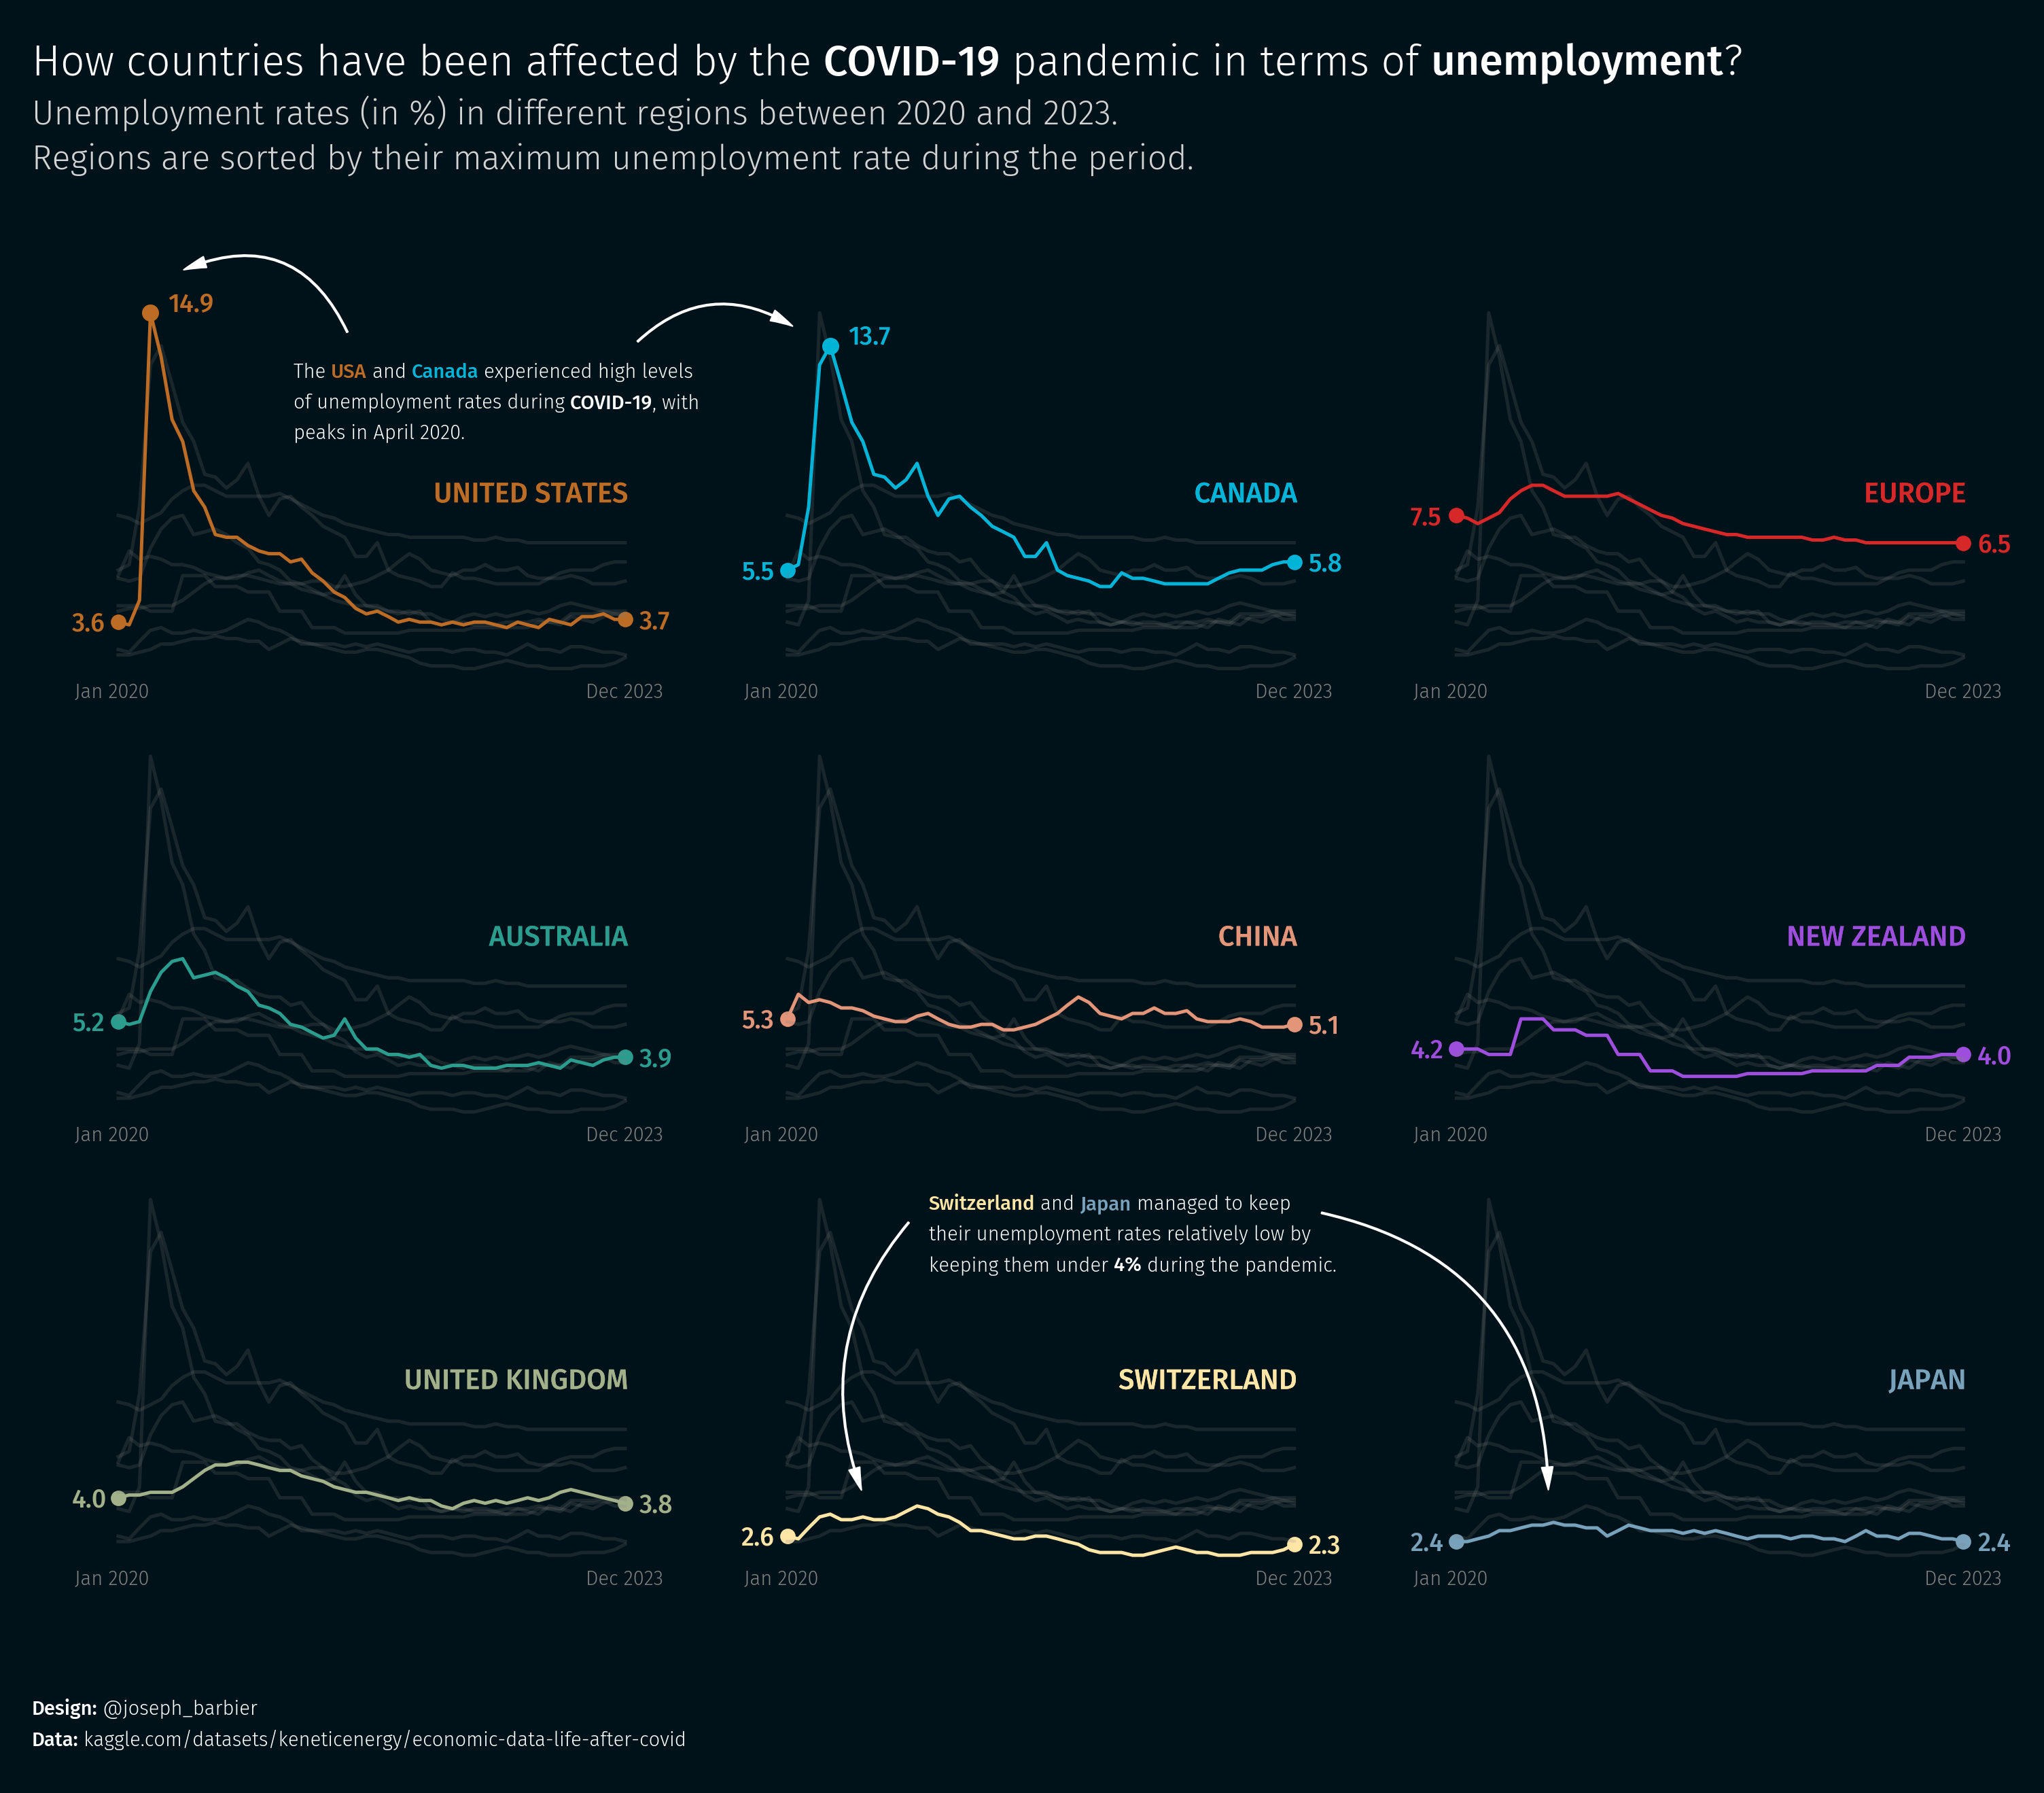

In [261]:
# parameters
dpi = 300
category = 'country'
year = 'date'
value = 'unemployment rate'
background_color = '#001219'
text_color = 'white'
linewidth_main = 1.2
colors = [
    '#bc6c25','#00b4d8','#d62828',
    '#2a9d8f','#e29578','#9d4edd',
    '#a3b18a','#ffe6a7','#78a1bb'
]
y_adj = 4

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

fig, axs = plt.subplots(3, 3, figsize=(12, 8), dpi=dpi)
fig.set_facecolor(background_color)

# default order for the countries
countries = df[category].unique()

# custom order for the countries
countries = [
   'australia','china','europe',
   'canada','united states','new zealand',
   'united kingdom','switzerland','japan'
]
countries = df.groupby('country')['unemployment rate'].max().sort_values(ascending=False).index.tolist()

for i, (group, ax) in enumerate(zip(countries, axs.flat)):

   # Set the background color
   ax.set_facecolor(background_color)

   # Filter for the group
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot last data point
   filtered_df = filtered_df.sort_values(by=year)
   last_value = filtered_df.iloc[-1][value]
   last_date = filtered_df.iloc[-1][year]
   first_value = filtered_df.iloc[0][value]
   first_date = filtered_df.iloc[0][year]
   ax.scatter(
      [first_date, last_date],
      [first_value, last_value],
      s=20, color=colors[i],
   )
   ax_text(
      last_date + pd.Timedelta(days=40), last_value+0.4,
      f'{round(last_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )
   ax_text(
      first_date - pd.Timedelta(days=130), first_value+0.4,
      f'{round(first_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )

   # Plot other groups with lighter colors 
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color='grey', alpha=0.2, linewidth=linewidth_main)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color=colors[i], linewidth=linewidth_main, zorder=10)

   # add USA and Canada max value
   if group in ['united states', 'canada']:
      maxrate = df[df['country']==group][value].max()
      date_maxrate = df[(df['country']==group) & (df['unemployment rate']==maxrate)][year]
      ax.plot(
         date_maxrate, maxrate,
         marker='o', markersize=5, color=colors[i], zorder=10
      )
      ax_text(
         date_maxrate + pd.Timedelta(days=50), maxrate+0.8,
         f'{round(maxrate,1)}',
         fontsize=9, color=colors[i],
         font=bold_font,
         ax=ax
      )

   
   # Custom axes
   ax.set_axis_off()
   ax.set_ylim(df[value].min()-0.2, df[value].max()+0.3)

   # Display country names
   ax_text(
      19700, df[value].mean()+y_adj,
      f'<{group.upper()}>',
      va='top', ha='right',
      fontsize=10, font=bold_font,
      color=colors[i], ax=ax,
      highlight_textprops=[{
         "path_effects": path_effect
      }]
   )

   # Reference dates (Jan 2020 and Dec 2023)
   ax_text(
      18350, df[value].min()-0.5,
      'Jan 2020',
      va='top', ha='right',
      fontsize=7, font=font,
      color='grey', ax=ax
   )
   ax_text(
      19800, df[value].min()-0.5,
      'Dec 2023',
      va='top', ha='right',
      fontsize=7, font=font,
      color='grey', ax=ax
   )

# credit
credit = """
<Design:> @joseph_barbier
<Data:> kaggle.com/datasets/keneticenergy/economic-data-life-after-covid
"""
fig_text(
   0.1, 0.01,
   credit,
   fontsize=7,
   ha='left', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'font': bold_font},
      {'font': bold_font}
   ],
   fig=fig
)

# title
start_x_position = df.iloc[0][year]
end_x_position = df.iloc[-1][year]
title = f"""
Evolution of <{value}> between <{str(start_x_position)[:4]}> and <{str(end_x_position)[:4]}>
"""
title = f"""
How countries have been affected by the <COVID-19> pandemic in terms of <unemployment>?
<Unemployment rates (in %) in different regions between 2020 and 2023.>
<Regions are sorted by their maximum unemployment rate during the period.>
"""
fig_text(
   0.1, 1,
   title,
   fontsize=15,
   ha='left', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'font': bold_font},
      {'font': bold_font},
      {'color': 'lightgrey', 'fontsize': 12},
      {'color': 'lightgrey', 'fontsize': 12}
   ],
   fig=fig
)

# arrow function
def draw_arrow(tail_position, head_position, invert=False, radius=0.5):
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=text_color, lw=0.5)
    if invert:
        connectionstyle = f"arc3,rad=-{radius}"
    else:
        connectionstyle = f"arc3,rad={radius}"
    a = FancyArrowPatch(
        tail_position, head_position,
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        **kw
    )
    fig.patches.append(a)

# arrows for the USA and Canada
draw_arrow((0.23, 0.86), (0.16, 0.9), invert=False, radius=0.5)
draw_arrow((0.346, 0.855), (0.413, 0.865), invert=True, radius=0.4)
maxrate_canada = df[df['country']=='canada']['unemployment rate'].max()
maxrate_usa = df[df['country']=='united states']['unemployment rate'].max()
text = f"""
The <USA> and <Canada> experienced high levels
of unemployment rates during <COVID-19>, with
peaks in April 2020.
"""
fig_text(
   0.29, 0.82,
   text,
   fontsize=7,
   ha='center', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'color': colors[0], 'font':bold_font},
      {'color': colors[1], 'font':bold_font},
      {'font': bold_font}
   ],
   fig=fig
)

# arrows for Japan and Switzerland
draw_arrow((0.625, 0.324), (0.72, 0.15), invert=True, radius=0.4)
draw_arrow((0.46, 0.32), (0.44, 0.15), invert=False, radius=0.3)
text = f"""
<Switzerland> and <Japan> managed to keep
their unemployment rates relatively low by
keeping them under <4%> during the pandemic.
"""
fig_text(
   0.55, 0.31,
   text,
   fontsize=7,
   ha='center', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'color': colors[7], 'font':bold_font},
      {'color': colors[8], 'font':bold_font},
      {'font': bold_font},
   ],
   fig=fig
)

fig.savefig(f'unemployment_linecharts.png', bbox_inches='tight', dpi=dpi)
plt.show()